<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/3_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
# Load the data
df = pd.read_csv('WEAT ETF Stock Price History.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-29,5.97,5.99,5.998,5.92,584.92K,-0.50%
2023-12-28,6.00,5.94,6.030,5.94,634.94K,1.18%
2023-12-27,5.93,5.97,5.990,5.91,764.65K,-1.66%
2023-12-26,6.03,5.86,6.060,5.83,1.06M,2.90%
2023-12-22,5.86,5.85,5.899,5.85,606.12K,0.17%


In [4]:
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-01-28,13.74,14.01,14.01,13.70,6.46K,-0.79%
2014-01-27,13.85,14.19,14.19,13.63,32.25K,-0.86%
2014-01-24,13.97,14.03,14.03,13.80,48.43K,-0.92%
2014-01-23,14.10,14.68,14.68,14.02,26.31K,1.37%
2014-01-22,13.91,13.95,13.96,13.81,2.04K,-0.14%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2528 entries, 2023-12-29 to 2014-01-22
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2528 non-null   float64
 1   Open      2528 non-null   float64
 2   High      2528 non-null   float64
 3   Low       2528 non-null   float64
 4   Vol.      2503 non-null   object 
 5   Change %  2528 non-null   object 
dtypes: float64(4), object(2)
memory usage: 138.2+ KB


In [6]:
df.shape

(2528, 6)

In [7]:
df.describe()

,Price,Open,High,Low
count,2528.000000,2528.000000,2528.000000,2528.000000
mean,7.845369,7.851388,7.926894,7.764583
std,2.561897,2.568559,2.602286,2.522623
min,4.860000,4.880000,4.960000,4.830000
25%,6.030000,6.047500,6.080000,5.990000
50%,6.980000,6.970000,7.050000,6.910000
75%,9.012500,9.022500,9.100000,8.920250
max,17.470000,17.430000,17.550000,17.180000


In [8]:
df.nunique()

Price        777
Open         774
High         874
Low          846
Vol.        2352
Change %     681
dtype: int64

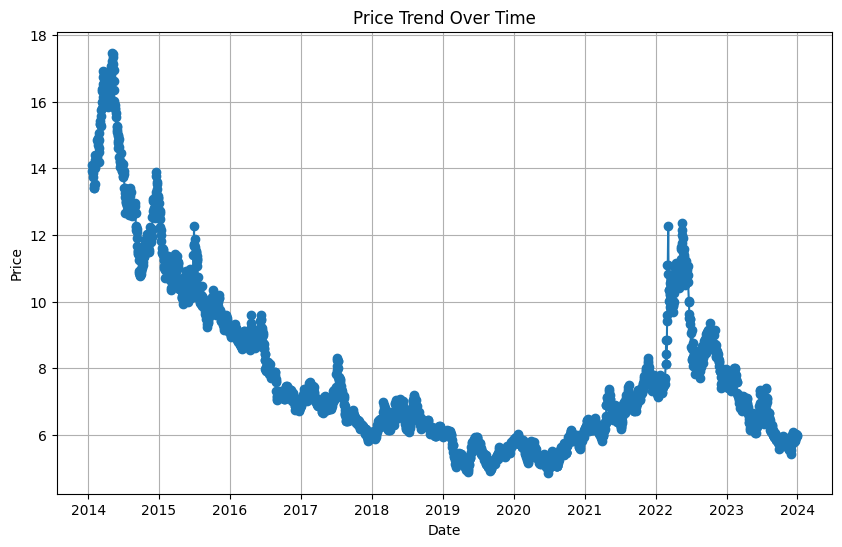

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], marker='o', linestyle='-')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

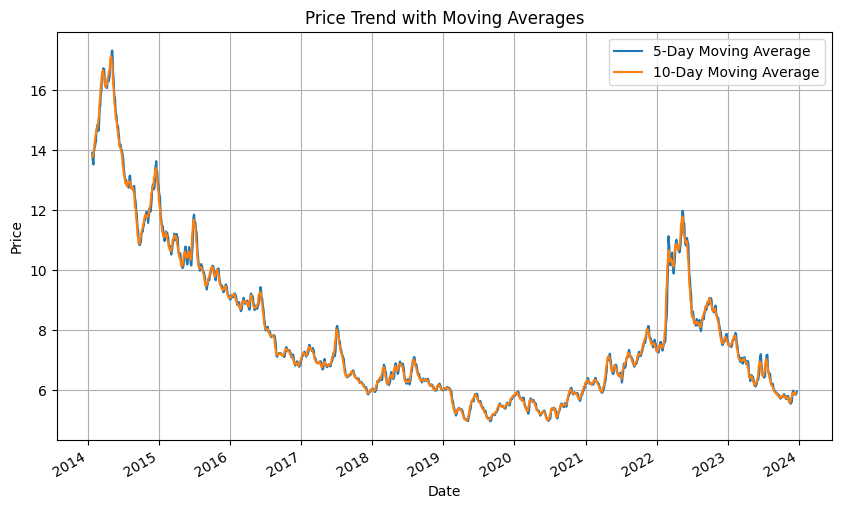

In [10]:
plt.figure(figsize=(10, 6))
df['Price'].rolling(window=5).mean().plot(label='5-Day Moving Average')
df['Price'].rolling(window=10).mean().plot(label='10-Day Moving Average')
plt.title('Price Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

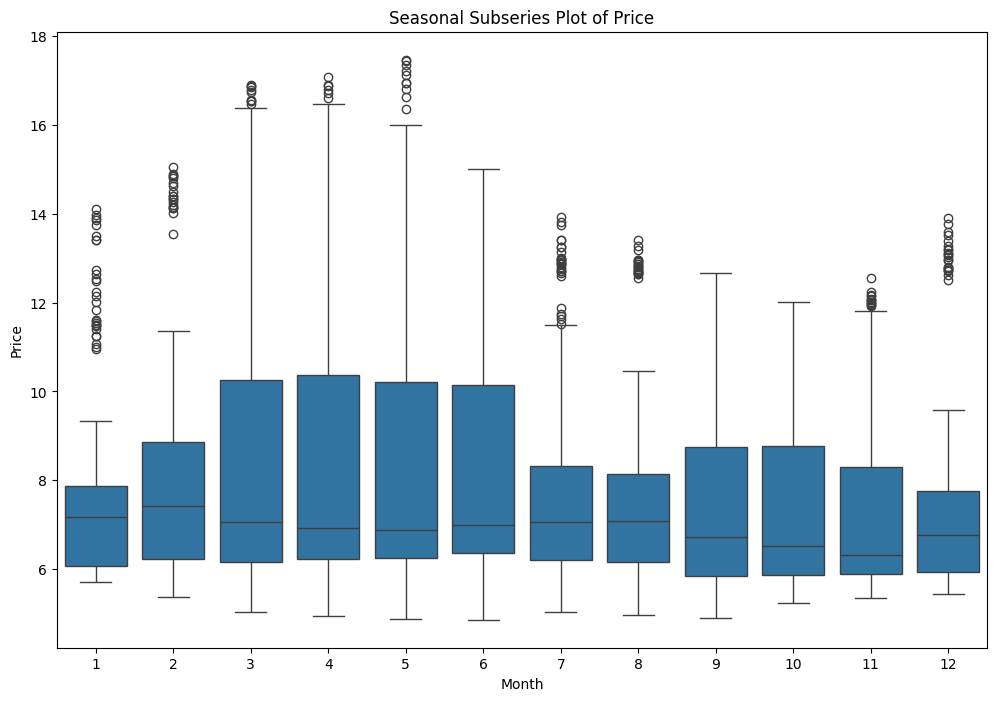

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df.index.month, y=df['Price'])
plt.title('Seasonal Subseries Plot of Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

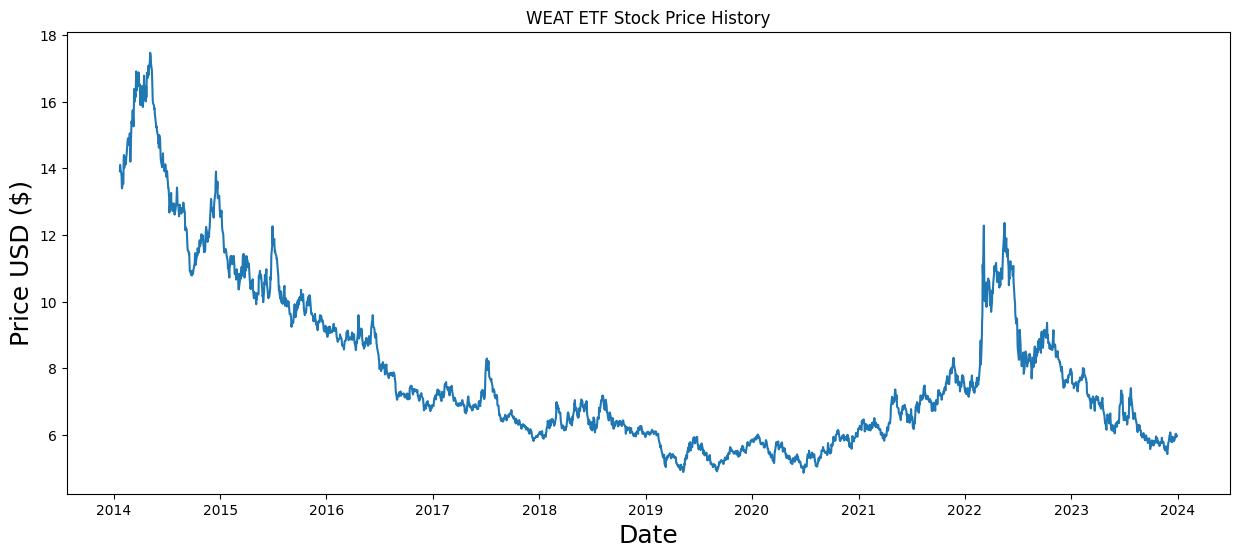

In [12]:
plt.figure(figsize=(15,6))
plt.title('WEAT ETF Stock Price History')
plt.plot(df['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [13]:
df.index

DatetimeIndex(['2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26',
               '2023-12-22', '2023-12-21', '2023-12-20', '2023-12-19',
               '2023-12-18', '2023-12-15',
               ...
               '2014-02-04', '2014-02-03', '2014-01-31', '2014-01-30',
               '2014-01-29', '2014-01-28', '2014-01-27', '2014-01-24',
               '2014-01-23', '2014-01-22'],
              dtype='datetime64[ns]', name='Date', length=2528, freq=None)

In [14]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [15]:
# Replace any missing or NaN values in the 'Vol.' column with '0'
df['Vol.'] = df['Vol.'].fillna('0')

In [16]:
# Convert the 'Vol.' column to numeric data
df['Vol.'] = df['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [17]:
# Convert the 'Change %' column to numeric data
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

In [18]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-12-29,5.97,5.99,5.998,5.92,584920,-0.50
2023-12-28,6.00,5.94,6.030,5.94,634940,1.18
2023-12-27,5.93,5.97,5.990,5.91,764650,-1.66
2023-12-26,6.03,5.86,6.060,5.83,1060000,2.90
2023-12-22,5.86,5.85,5.899,5.85,606120,0.17


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2528 entries, 2023-12-29 to 2014-01-22
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2528 non-null   float64
 1   Open      2528 non-null   float64
 2   High      2528 non-null   float64
 3   Low       2528 non-null   float64
 4   Vol.      2528 non-null   int64  
 5   Change %  2528 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 138.2 KB


In [20]:
#Split the data into training and testing data sets
train_df = df.iloc[:int(.99*len(df)), :]
test_df = df.iloc[int(.99*len(df)):, :]

In [21]:
#Define the features and target variable
features = ['Open', 'Vol.']
target = 'Price'

In [22]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_df[features], train_df[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
#Make and show the predictions on the test data
predictions = model.predict(test_df[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[14.900031 14.892329 15.177306 14.080025 14.842505 14.854048 14.923595
 14.20383  14.265348 14.204687 14.265348 14.149044 14.292182 14.086724
 14.346176 14.288405 14.157655 13.584981 13.578556 13.572086 13.572086
 14.086724 14.201397 13.986461 14.143582 14.086724]


In [24]:
#Show the actual values
print('Actual Values:')
print(test_df[target])

Actual Values:
Date
2014-02-27    14.20
2014-02-26    14.62
2014-02-25    15.05
2014-02-24    14.85
2014-02-21    14.70
2014-02-20    14.80
2014-02-19    14.90
2014-02-18    14.86
2014-02-14    14.40
2014-02-13    14.34
2014-02-12    14.16
2014-02-11    14.12
2014-02-10    14.34
2014-02-07    14.12
2014-02-06    14.01
2014-02-05    14.40
2014-02-04    14.26
2014-02-03    13.54
2014-01-31    13.50
2014-01-30    13.42
2014-01-29    13.40
2014-01-28    13.74
2014-01-27    13.85
2014-01-24    13.97
2014-01-23    14.10
2014-01-22    13.91
Name: Price, dtype: float64


In [25]:
#Show the models accuracy
accuracy = model.score(test_df[features], test_df[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.6209120709289566


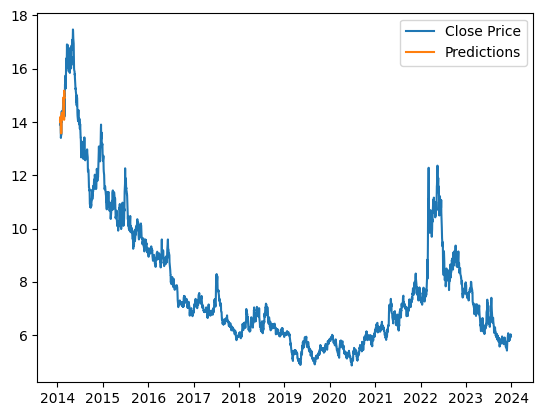

In [26]:
#Plot the predictions and the close price
plt.plot(df['Price'], label = 'Close Price')
plt.plot(test_df[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()